In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import linear_model
import seaborn as sns

df= pd.read_csv(r"C:./Desktop/all_matches.csv")
df.head(10)


c:\users\karan\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.6,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.7,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
7,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,1.1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,1.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,1.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.isnull().sum()

match_id                       0
season                         0
start_date                     0
venue                          0
innings                        0
ball                           0
batting_team                   0
bowling_team                   0
striker                        0
non_striker                    0
bowler                         0
runs_off_bat                   0
extras                         0
wides                     201718
noballs                   207196
byes                      207495
legbyes                   204754
penalty                   208040
wicket_type               197803
player_dismissed          197803
other_wicket_type         208042
other_player_dismissed    208042
dtype: int64

In [3]:
df.shape

(208042, 22)

In [4]:
df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [13]:
print('\n all teams : ',df['batting_team'].unique())


 all teams :  ['Kolkata Knight Riders' 'Royal Challengers Bangalore'
 'Chennai Super Kings' 'Kings XI Punjab' 'Rajasthan Royals'
 'Delhi Daredevils' 'Deccan Chargers' 'Mumbai Indians'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Sunrisers Hyderabad'
 'Rising Pune Supergiants' 'Gujarat Lions' 'Rising Pune Supergiant'
 'Delhi Capitals' 'Punjab Kings']


In [7]:
df['wicket_type'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field'], dtype=object)

In [27]:
wicketkeeper_stumped=df[df['wicket_type']=='stumped']['bowling_team'].value_counts().reset_index()
wicketkeeper_stumped.style.hide_index()
wicketkeeper_stumped

,index,bowling_team
0,Kolkata Knight Riders,47
1,Royal Challengers Bangalore,40
2,Mumbai Indians,38
3,Rajasthan Royals,35
4,Chennai Super Kings,34
5,Delhi Daredevils,30
6,Kings XI Punjab,26
7,Deccan Chargers,17
8,Sunrisers Hyderabad,13
9,Delhi Capitals,9


In [34]:
wicketkeeper_stumped.rename(columns={'index':'Teams','bowling_team':'Total_stumping'},inplace=True)
wicketkeeper_stumped

,Teams,Total_stumping
0,Kolkata Knight Riders,47
1,Royal Challengers Bangalore,40
2,Mumbai Indians,38
3,Rajasthan Royals,35
4,Chennai Super Kings,34
5,Delhi Daredevils,30
6,Kings XI Punjab,26
7,Deccan Chargers,17
8,Sunrisers Hyderabad,13
9,Delhi Capitals,9


<AxesSubplot:xlabel='Teams'>

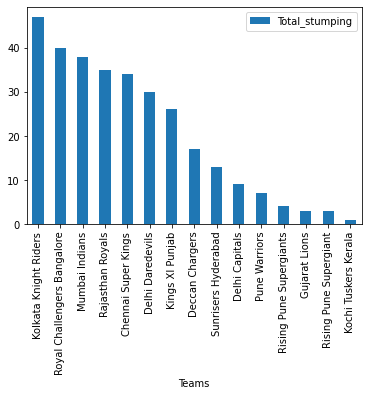

In [46]:
s1 =wicketkeeper_stumped.head(25)
s1.plot.bar(x="Teams")


<AxesSubplot:xlabel='Teams'>

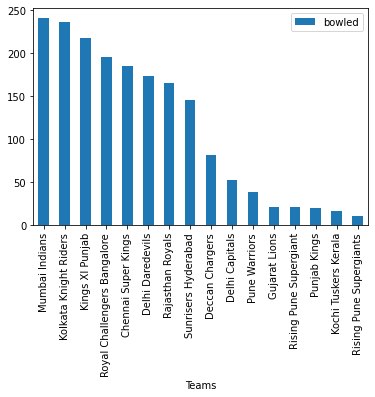

In [54]:
wicketkeeper_bowled=df[df['wicket_type']=='bowled']['bowling_team'].value_counts().reset_index()
wicketkeeper_bowled.style.hide_index()
wicketkeeper_bowled.rename(columns={'index':'Teams','bowling_team':'bowled'},inplace=True)
s2 =wicketkeeper_bowled.head(25)
s2.plot.bar(x="Teams")

<AxesSubplot:xlabel='Teams'>

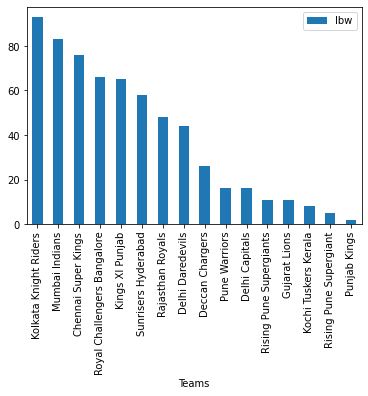

In [55]:
wicketkeeper_lbw=df[df['wicket_type']=='lbw']['bowling_team'].value_counts().reset_index()
wicketkeeper_lbw.style.hide_index()
wicketkeeper_lbw.rename(columns={'index':'Teams','bowling_team':'lbw'},inplace=True)
s2 =wicketkeeper_lbw.head(25)
s2.plot.bar(x="Teams")

<AxesSubplot:xlabel='Teams'>

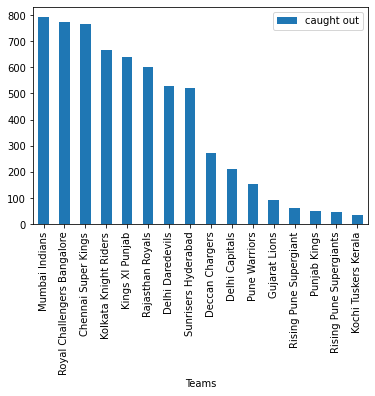

In [58]:
wicketkeeper_caught=df[df['wicket_type']=='caught']['bowling_team'].value_counts().reset_index()
wicketkeeper_caught.style.hide_index()
wicketkeeper_caught.rename(columns={'index':'Teams','bowling_team':'caught out'},inplace=True)
s2 =wicketkeeper_caught.head(25)
s2.plot.bar(x="Teams")

<AxesSubplot:xlabel='Teams'>

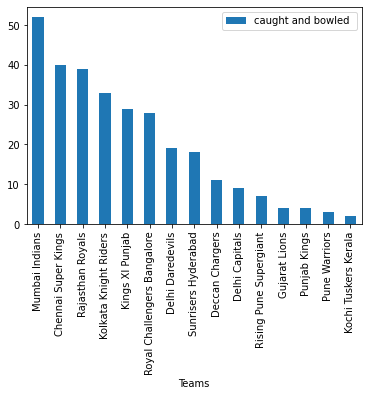

In [59]:
wicketkeeper_caught1=df[df['wicket_type']=='caught and bowled']['bowling_team'].value_counts().reset_index()
wicketkeeper_caught1.style.hide_index()
wicketkeeper_caught1.rename(columns={'index':'Teams','bowling_team':'caught and bowled '},inplace=True)
s2 =wicketkeeper_caught1.head(25)
s2.plot.bar(x="Teams")

In [68]:
#Fielding analysis
df['extras'].unique()

array([1, 0, 5, 4, 2, 3, 7], dtype=int64)

<AxesSubplot:xlabel='Teams'>

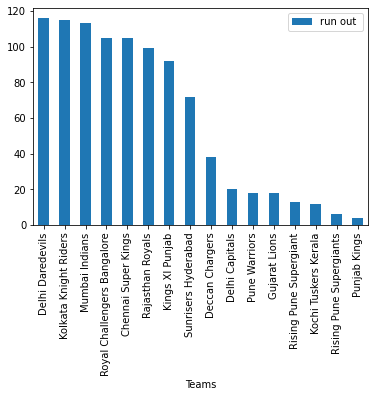

In [70]:
wicketkeeper_caught1=df[df['wicket_type']=='run out']['bowling_team'].value_counts().reset_index()
wicketkeeper_caught1.style.hide_index()
wicketkeeper_caught1.rename(columns={'index':'Teams','bowling_team':'run out '},inplace=True)
s2 =wicketkeeper_caught1.head(25)
s2.plot.bar(x="Teams")

In [110]:
df['wicket_type'].value_counts()



caught                   6212
bowled                   1821
run out                   946
lbw                       628
stumped                   307
caught and bowled         298
hit wicket                 13
retired hurt               12
obstructing the field       2
Name: wicket_type, dtype: int64

In [87]:
runs = df.groupby(['striker'])['runs_off_bat'].sum().reset_index()
runs.columns=['Batsman','Runs']
y = runs.sort_values(by='Runs',ascending=False ).head(15)
y

,Batsman,Runs
527,V Kohli,6293
426,S Dhawan,5784
396,RG Sharma,5613
457,SK Raina,5536
120,DA Warner,5451
24,AB de Villiers,5181
100,CH Gayle,4997
316,MS Dhoni,4746
417,RV Uthappa,4724
160,G Gambhir,4217


Text(0.5, 1.0, 'Top Runs scorers')

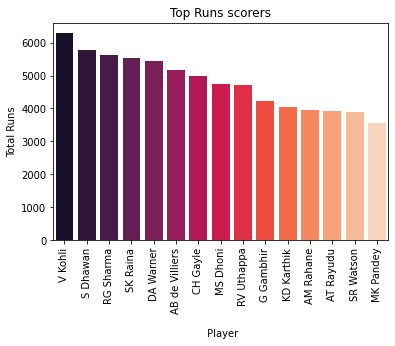

In [93]:
import seaborn as sns
ax = plt.axes()
sns.barplot(x=y['Batsman'],y=y['Runs'],palette='rocket',saturation=1)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('\n Player')
plt.ylabel('Total Runs')
plt.title('Top Runs scorers')


# season with most matches

In [3]:
import pandas as pd
df1= pd.read_csv(r"C:./Desktop/all_season_summary.csv")
df1.head(5)

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,2020,1216492,Mumbai Indians v Chennai Super Kings,Mumbai Indians v Chennai Super Kings,"1st Match (N), Indian PreMumbai Indianser Leag...",Mumbai Indians,Chennai Super Kings,Chennai Super Kings,BOWL FIRST,162/9,...,"Rohit Sharma (BT),Quinton de Kock (WK),Suryaku...","Murali Vijay (BT),Shane Watson (AR),Faf du Ple...","Ambati Rayudu,Faf du Plessis","Lungi Ngidi,Deepak Chahar",19 September 2020 - night match (20-over match),Chris Gaffaney,Virender Sharma,Sundaram Ravi,Manu Nayyar,Ulhas Gandhe
1,2020,1216493,Delhi Capitals v Kings XI Punjab,Delhi Capitals v Kings XI Punjab,"2nd Match (N), Indian PreMumbai Indianser Leag...",Delhi Capitals,Kings XI Punjab,Kings XI Punjab,BOWL FIRST,157/8,...,"Prithvi Shaw (BT),Shikhar Dhawan (BT),Shimron ...","KL Rahul (WK),Mayank Agarwal (BT),Karun Nair (...","Mayank Agarwal,KL Rahul","Mohammed ShaMumbai Indians,Sheldon Cottrell",20 September 2020 - night match (20-over match),Anil Chaudhary,Nitin Menon,Paul Reiffel,Javagal Srinath,Yeshwant Barde
2,2020,1216534,Sunrisers Hyderabad v Royal Challengers Bangalore,Sunrisers Hyderabad v Royal Challengers Bangalore,"3rd Match (N), Indian PreMumbai Indianser Leag...",Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,BOWL FIRST,163/5,...,"David Warner (BT),Jonny Bairstow (WK),Manish P...","Devdutt Padikkal (BT),Aaron Finch (BT),Virat K...","Devdutt Padikkal,AB de Villiers","Yuzvendra Chahal,Shivam Dube",21 September 2020 - night match (20-over match),Anil Dandekar,Nitin Menon,Anil Chaudhary,Prakash Bhatt,Yeshwant Barde
3,2020,1216496,Rajasthan Royals v Chennai Super Kings,Rajasthan Royals v Chennai Super Kings,"4th Match (N), Indian PreMumbai Indianser Leag...",Rajasthan Royals,Chennai Super Kings,Chennai Super Kings,BOWL FIRST,216/7,...,"Yashasvi Jaiswal (BT),Steven SMumbai Indiansth...","Murali Vijay (BT),Shane Watson (AR),Faf du Ple...","Faf du Plessis,Shane Watson","Sam CuRajasthan Royalsan,Deepak Chahar",22 September 2020 - night match (20-over match),Chettithody Shamshuddin,Vineet Kulkarni,KN Ananthapadmanabhan,Vengalil Narayan Kutty,Krishnamachari Srinivasan
4,2020,1216508,Kolkata Knight Riders v Mumbai Indians,Kolkata Knight Riders v Mumbai Indians,"5th Match (N), Indian PreMumbai Indianser Leag...",Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,BOWL FIRST,195/5,...,"Shubman Gill (BT),Sunil Narine (AR),Dinesh Kar...","Quinton de Kock (WK),Rohit Sharma (BT),Suryaku...","Rohit Sharma,Suryakumar Yadav","James Pattinson,Rahul Chahar",23 September 2020 - night match (20-over match),Chris Gaffaney,Sundaram Ravi,Virender Sharma,Manu Nayyar,Pashchim Pathak


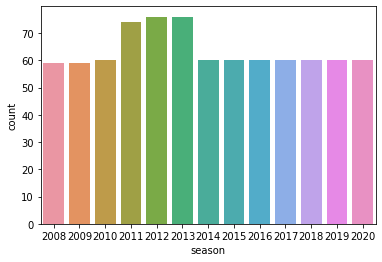

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='season', data=df1)
plt.show()

# Most successful ipl team

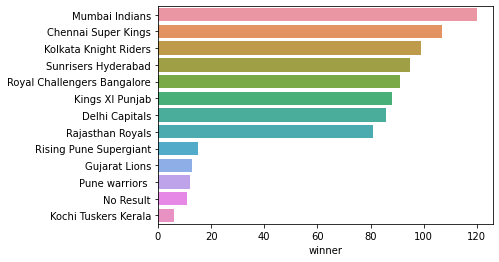

In [8]:
data = df1.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h');


# Number of matches in each venue

c:\users\karan\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


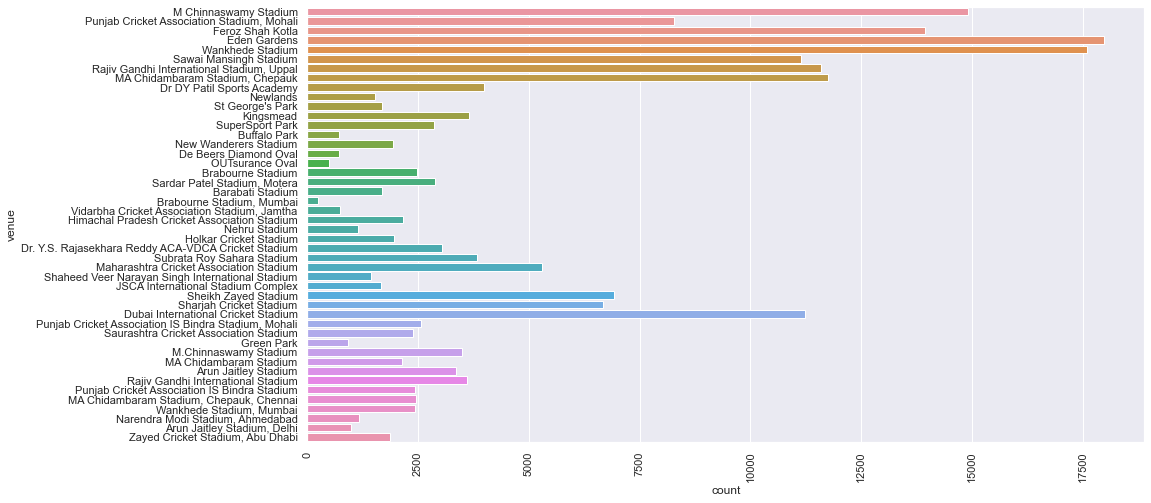

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv(r"C:./Desktop/all_matches.csv")
sns.countplot(y='venue', data=df)
plt.xticks(rotation=90)
plt.show()

# Score distribution of each team by innings


In [24]:

runs = df.groupby(['match_id','innings','batting_team'])['runs_off_bat'].sum().reset_index()
runs

,match_id,innings,batting_team,runs_off_bat
0,335982,1,Kolkata Knight Riders,205
1,335982,2,Royal Challengers Bangalore,63
2,335983,1,Chennai Super Kings,234
3,335983,2,Kings XI Punjab,196
4,335984,1,Rajasthan Royals,122
...,...,...,...,...
1775,1254115,2,Kolkata Knight Riders,134
1776,1254116,1,Delhi Capitals,129
1777,1254116,2,Kolkata Knight Riders,126
1778,1254117,1,Chennai Super Kings,186


In [25]:
runs.drop('match_id',axis=1,inplace=True)

In [27]:
# For first innings
innings1 = runs[runs['innings']==1]
innings1.drop('innings',axis=1,inplace=True)
innings1

c:\users\karan\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,batting_team,runs_off_bat
0,Kolkata Knight Riders,205
2,Chennai Super Kings,234
4,Rajasthan Royals,122
6,Mumbai Indians,154
8,Deccan Chargers,100
...,...,...
1770,Royal Challengers Bangalore,151
1772,Delhi Capitals,166
1774,Royal Challengers Bangalore,125
1776,Delhi Capitals,129


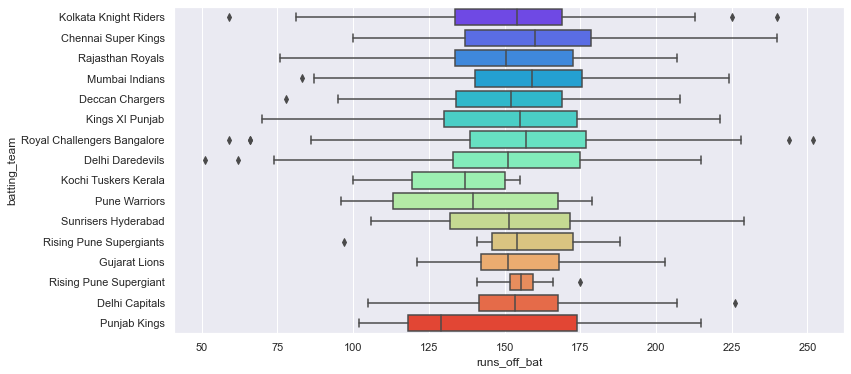

In [30]:
plt.figure(figsize=(12,6))
sns.boxplot(y='batting_team',x='runs_off_bat',data=innings1, palette='rainbow');

# For 2nd innings


c:\users\karan\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='runs_off_bat', ylabel='batting_team'>

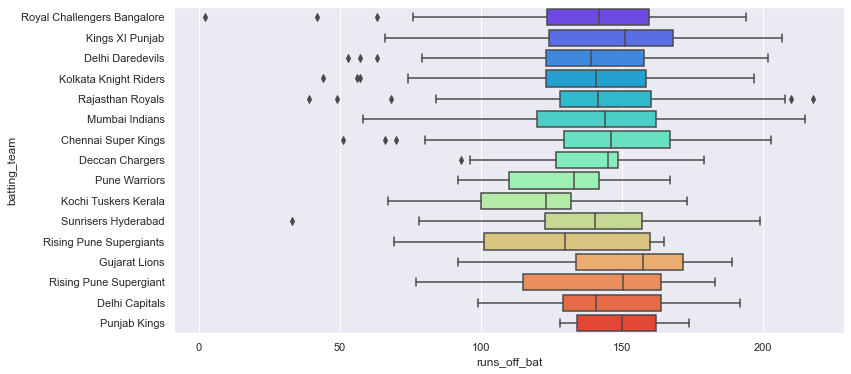

In [32]:
innings2 = runs[runs['innings']==2]
innings2.drop('innings',axis=1,inplace=True)
plt.figure(figsize=(12,6))
sns.boxplot(data=innings2, y='batting_team', x='runs_off_bat', palette='rainbow')

In [42]:
matches = pd.read_csv(r"C:./Desktop/all_season_summary.csv")
matches['home_team'].unique()

array(['Mumbai Indians', 'Delhi Capitals', 'Sunrisers Hyderabad',
       'Rajasthan Royals', 'Kolkata Knight Riders', 'Kings XI Punjab',
       'Chennai Super Kings', 'Royal Challengers Bangalore',
       'Rising Pune Supergiant', 'Gujarat Lions', 'Pune warriors ',
       'Kochi Tuskers Kerala'], dtype=object)

In [47]:
def comparison(team1,team2):
    compare = matches[((matches['home_team']==team1) | (matches['away_team']==team1)) & ((matches['home_team']==team2) | (matches['away_team']==team2))]
    return sns.countplot(x='season',hue='winner',data=compare)

<AxesSubplot:xlabel='season', ylabel='count'>

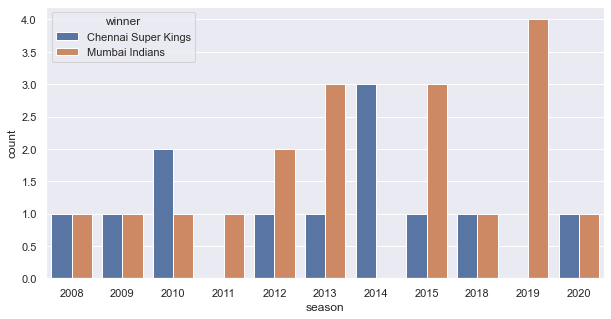

In [48]:
plt.figure(figsize=(10,5))
comparison('Mumbai Indians','Chennai Super Kings')

# Innings wise batting performance of each team in ipl (2008-21)

c:\users\karan\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<AxesSubplot:xlabel='innings', ylabel='batting_team'>

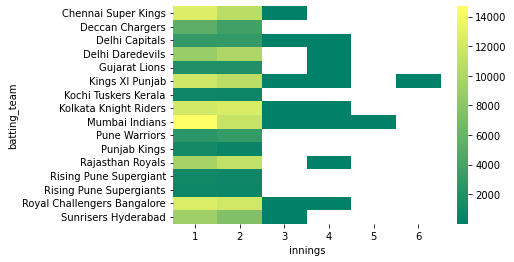

In [9]:
import pandas as pd
import seaborn as sns
df= pd.read_csv(r"C:./Desktop/all_matches.csv")
d=df
d=d[['batting_team','innings','runs_off_bat']]
x=d.pivot_table(values='runs_off_bat',index='batting_team',columns='innings',aggfunc='count')
sns.heatmap(x,cmap='summer')

<AxesSubplot:xlabel='season', ylabel='batting_team'>

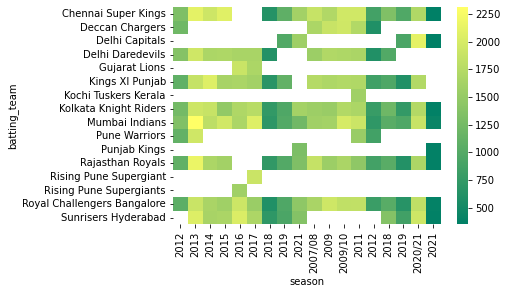

In [10]:
import pandas as pd
import seaborn as sns
df= pd.read_csv(r"C:./Desktop/all_matches.csv")
d=df
d=d[['batting_team','season','runs_off_bat']]
x=d.pivot_table(values='runs_off_bat',index='batting_team',columns='season',aggfunc='count')
sns.heatmap(x,cmap='summer')